In [41]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score
pd.options.display.float_format = "{:,.2f}".format
import sys
sys.path.append("../")
from src import soporte_ajuste as sa

In [42]:
# Para no tener que reiniciar el kernel
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
# Configuración warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [44]:
# Instrucción para visualizar todas las columnas de un dataFrame
pd.set_option('display.max_columns', None)

El modelo de predicción sobre los clusters que construimos en este notebook será para predecir el beneficio, dado por la variale 'Profit'.

'Profit' es nuestra variable respuesta, la cogemos del datafrmae original para insganciar las clases que nos calcularán los modelos de regresión

In [45]:
df_orig = pd.read_csv('datos/Global_Superstore.csv', encoding='latin-1')
df_orig.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,"10,024.00",US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,"2,309.65",7,0.00,762.18,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","3,709.39",9,0.10,-288.76,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID","5,175.17",9,0.10,919.97,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless","2,892.51",5,0.10,-96.54,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed","2,832.96",8,0.00,311.52,903.04,Critical


In [46]:
df = pd.read_csv('datos/Global_Superstore_clustering.csv', encoding='latin-1', index_col=0)
df.head()



,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,clusters_dbscan
0,0.00,0.00,0.00,0.05,0.00,0.52,0.02,0.02,0.19,0.19,0.06,0.00,0.20,0.06,0.00,4.23,1.55,-0.67,4.21,15.83,0.08,-1
1,0.00,0.00,0.00,0.20,0.00,0.30,0.00,0.02,0.06,0.21,0.07,0.00,0.19,0.07,0.00,7.10,2.42,-0.20,-1.82,15.66,0.08,-1
2,0.00,0.00,0.00,0.15,0.00,0.52,0.00,0.01,0.06,0.21,0.07,0.00,0.20,0.07,0.00,10.11,2.42,-0.20,5.11,15.52,0.57,-1
3,0.00,0.00,0.00,0.15,0.00,0.18,0.00,0.00,0.04,0.19,0.22,0.00,0.20,0.07,0.00,5.43,0.67,-0.20,-0.72,15.42,0.57,-1
4,0.00,0.00,0.00,0.05,0.00,0.52,0.00,0.00,0.00,0.09,0.09,0.00,0.20,0.04,0.00,5.30,1.99,-0.67,1.62,15.30,0.08,-1


In [47]:
df["Profit_vr"] = df_orig["Profit"]

In [48]:
df.drop(columns=["Profit"], inplace=True)

In [49]:
df1 = df[df["clusters_dbscan"] == -1] # dataframe con los datos del cluster -1
print(df1.shape[0])
df2 = df[df["clusters_dbscan"] == 0] # dataframe con los datos del cluster 0
print(df2.shape[0])
df3 = df[df["clusters_dbscan"] == 1] # dataframe con los datos del cluster 1
print(df3.shape[0])


4402
37240
9648


## Modelos para el cluster -1

In [50]:
df1 = df1.drop(columns=["clusters_dbscan"])
df1.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Segment', 'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Shipping Cost', 'Order Priority', 'Profit_vr'],
      dtype='object')

In [51]:
df1 = df1.drop(columns=['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Product ID'])
     
df1.columns

Index(['Segment', 'City', 'State', 'Country', 'Market', 'Region', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Shipping Cost', 'Order Priority', 'Profit_vr'],
      dtype='object')

### Decision Tree

In [52]:
# instanciamos la clase de regresión lineal
analisis = sa.AnalisisModelosRegresion(dataframe=df1, variable_dependiente='Profit_vr')

params_arbol = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [10, 50, 100, 200],
    'min_samples_leaf': [10, 50, 100, 200],
    'max_leaf_nodes': [4, 6, 8, 10, 20, 30]
}

# llamamos a la función para ajustar el modelo
analisis.ajustar_modelo(modelo='tree', param_grid=params_arbol)

In [58]:
# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados = analisis.obtener_resultados()
df_resultados.sample(10)

,Real,Predicho,Conjunto,Modelo,Residuos
3367,719.85,379.12,Test,tree,340.73
11900,-404.98,-508.99,Train,tree,104.02
3004,552.44,379.12,Test,tree,173.32
1878,224.99,142.42,Train,tree,82.57
4694,-219.48,70.18,Train,tree,-289.66
1590,614.70,379.12,Train,tree,235.58
17728,-121.30,-72.77,Train,tree,-48.53
1703,478.38,294.36,Train,tree,184.02
28300,13.86,115.50,Train,tree,-101.64
512,"-3,059.82","-2,116.81",Train,tree,-943.01


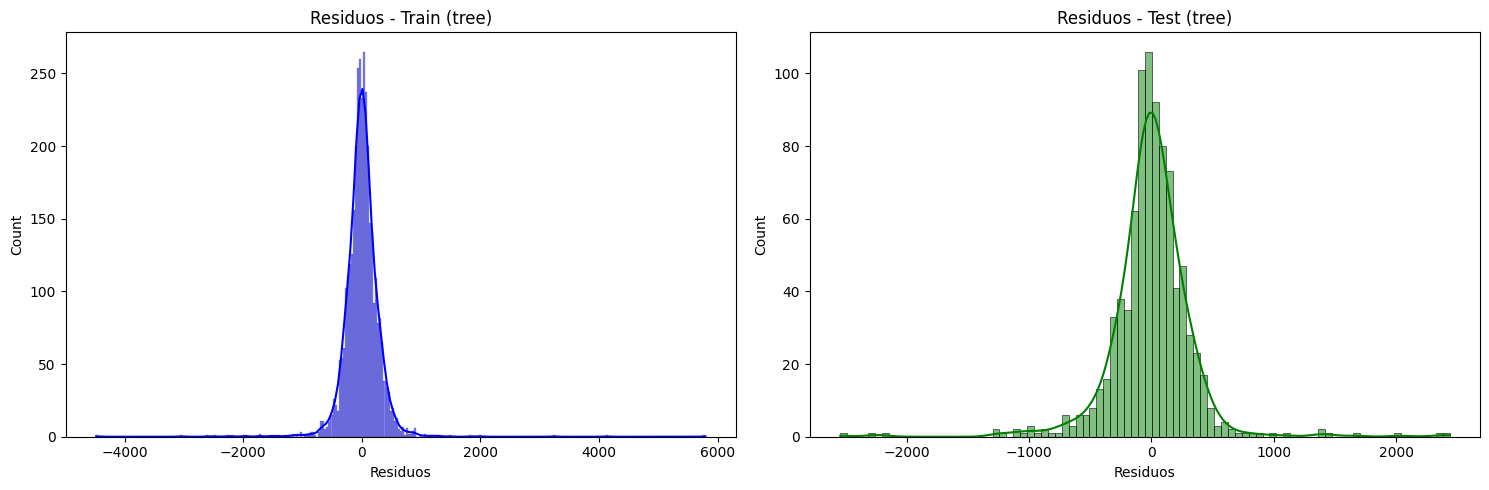

In [56]:
analisis.plot_residuos("tree")

In [57]:

analisis.calcular_metricas("tree")

,train,test
R2,0.66,0.65
MAE,192.07,211.61
MSE,"100,879.77","117,718.61"
RMSE,317.62,343.10


A la vista de los resultados obtenidos, los predichos, la grafica de residuos y el RMSE vemos que la predicción es bastante mala.

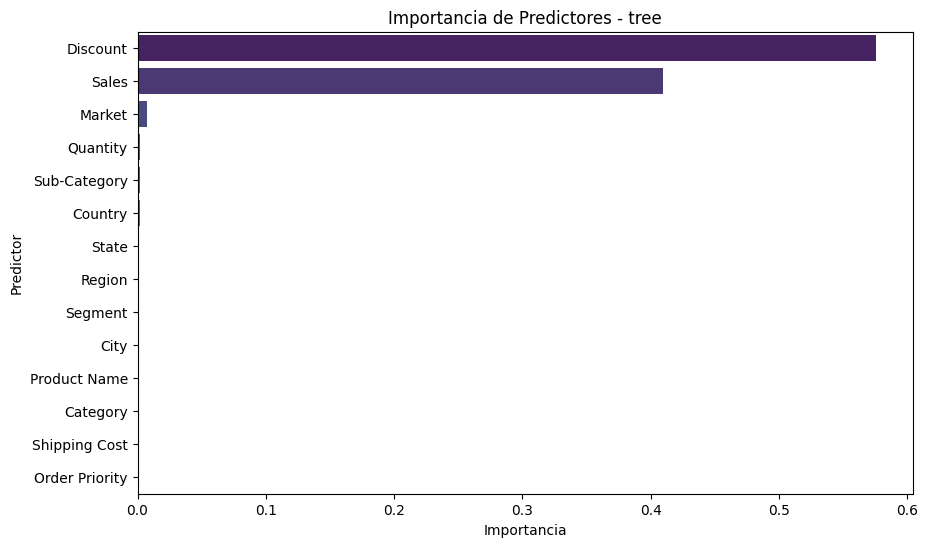

,Predictor,Importancia
11,Discount,0.58
9,Sales,0.41
4,Market,0.01
10,Quantity,0.00
7,Sub-Category,0.00
3,Country,0.00
2,State,0.00
5,Region,0.00
0,Segment,0.00
1,City,0.00


In [59]:
analisis.importancia_predictores("tree")

### Random Forest

In [61]:
# instanciamos la clase de regresión lineal
analisis_random_forest = sa.AnalisisModelosRegresion(dataframe=df1, variable_dependiente='Profit_vr')

params_rf = {
    'n_estimators': [100],
    'max_depth': [5],
    'min_samples_split': [10],
    'min_samples_leaf': [1], 
    'max_leaf_nodes': [30]
}

# llamamos a la función para ajustar el modelo
analisis_random_forest.ajustar_modelo(modelo='random_forest', param_grid=params_rf)

In [62]:
# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_analisis_random_forest = analisis_random_forest.obtener_resultados()
df_resultados_analisis_random_forest.head(3)

,Real,Predicho,Conjunto,Modelo,Residuos
1773,314.27,89.72,Train,random_forest,224.55
1220,33.00,135.81,Train,random_forest,-102.81
44,377.24,531.38,Train,random_forest,-154.14


In [63]:
analisis_random_forest.calcular_metricas("random_forest")

,train,test
R2,0.75,0.72
MAE,188.30,209.11
MSE,"71,890.92","96,053.06"
RMSE,268.12,309.92


Las métricas mejoran algo pero siguen siendo bastante malas y se aprecia overfitting.

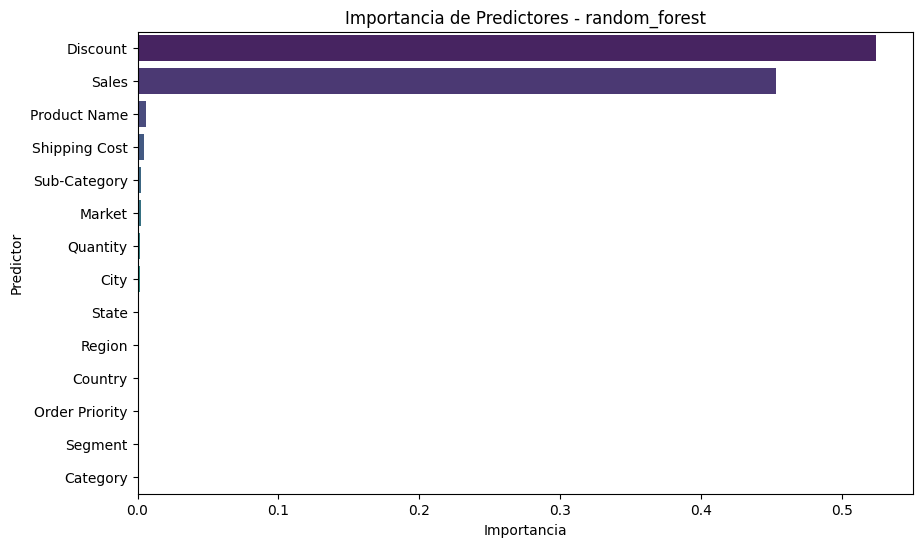

,Predictor,Importancia
11,Discount,0.52
9,Sales,0.45
8,Product Name,0.01
12,Shipping Cost,0.00
7,Sub-Category,0.00
4,Market,0.00
10,Quantity,0.00
1,City,0.00
2,State,0.00
5,Region,0.00


In [64]:
analisis_random_forest.importancia_predictores("random_forest")


### Gradient Boost

In [70]:
# instanciamos la clase de regresión lineal
analisis_gradient_boosting = sa.AnalisisModelosRegresion(dataframe=df1, variable_dependiente='Profit_vr')

params_gb = {
    'n_estimators': [50],
    'learning_rate': [0.01],
    'max_depth': [3],
    'min_samples_split': [2],
    'min_samples_leaf': [1,]
}

# llamamos a la función para ajustar el modelo
analisis_gradient_boosting.ajustar_modelo(modelo='gradient_boosting',param_grid = params_gb)

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_gradient_boosting = analisis_gradient_boosting.obtener_resultados()
df_resultados_gradient_boosting.head()

,Real,Predicho,Conjunto,Modelo,Residuos
1773,314.27,165.33,Train,gradient_boosting,148.95
1220,33.00,168.55,Train,gradient_boosting,-135.55
44,377.24,358.91,Train,gradient_boosting,18.33
289,"-1,331.65",-110.68,Train,gradient_boosting,"-1,220.97"
2713,-106.47,179.58,Train,gradient_boosting,-286.05


In [71]:
analisis_gradient_boosting.calcular_metricas("gradient_boosting")


,train,test
R2,0.41,0.36
MAE,264.45,287.76
MSE,"173,457.32","217,839.98"
RMSE,416.48,466.73


las métricas han empeorado con respecto a las anteriores.

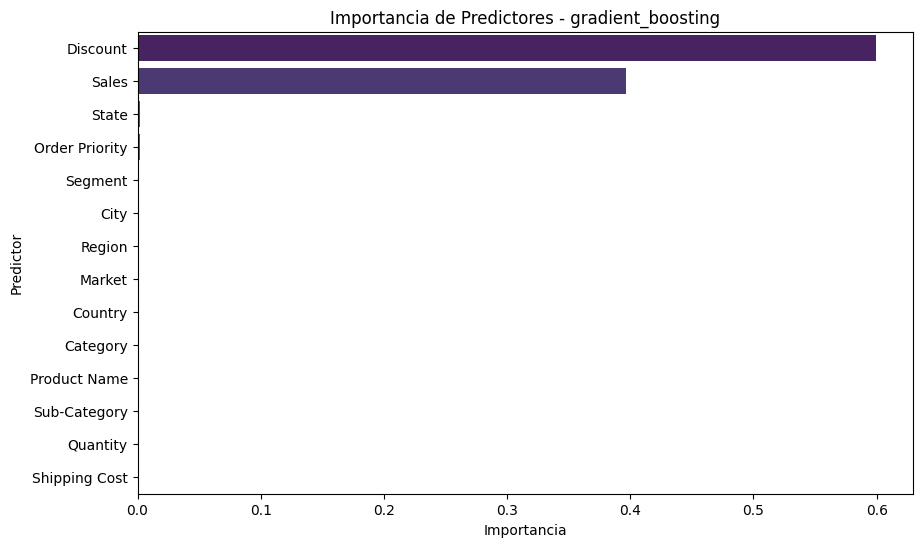

,Predictor,Importancia
11,Discount,0.60
9,Sales,0.40
2,State,0.00
13,Order Priority,0.00
0,Segment,0.00
1,City,0.00
5,Region,0.00
4,Market,0.00
3,Country,0.00
6,Category,0.00


In [72]:
analisis_gradient_boosting.importancia_predictores("gradient_boosting")


### Xgboost

In [78]:
analisis_xgboost= sa.AnalisisModelosRegresion(dataframe=df1, variable_dependiente='Profit_vr')
params_xgb = {
    'n_estimators': [50],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4],
    'min_child_weight': [1, 2],  
    'subsample': [0.8, 1.0],        
    'colsample_bytree': [0.8, 1.0]  
}

# llamamos a la función para ajustar el modelo
analisis_xgboost.ajustar_modelo(modelo='xgboost', param_grid=params_xgb)

In [79]:
# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_xgboost = analisis_xgboost.obtener_resultados()
df_resultados_xgboost.head()

,Real,Predicho,Conjunto,Modelo,Residuos
1773,314.27,200.83,Train,xgboost,113.44
1220,33.00,104.64,Train,xgboost,-71.64
44,377.24,449.59,Train,xgboost,-72.34
289,"-1,331.65",-838.05,Train,xgboost,-493.60
2713,-106.47,277.55,Train,xgboost,-384.02


In [80]:
analisis_xgboost.calcular_metricas("xgboost")

,train,test
R2,0.83,0.71
MAE,166.13,203.63
MSE,"50,079.44","99,189.85"
RMSE,223.78,314.94


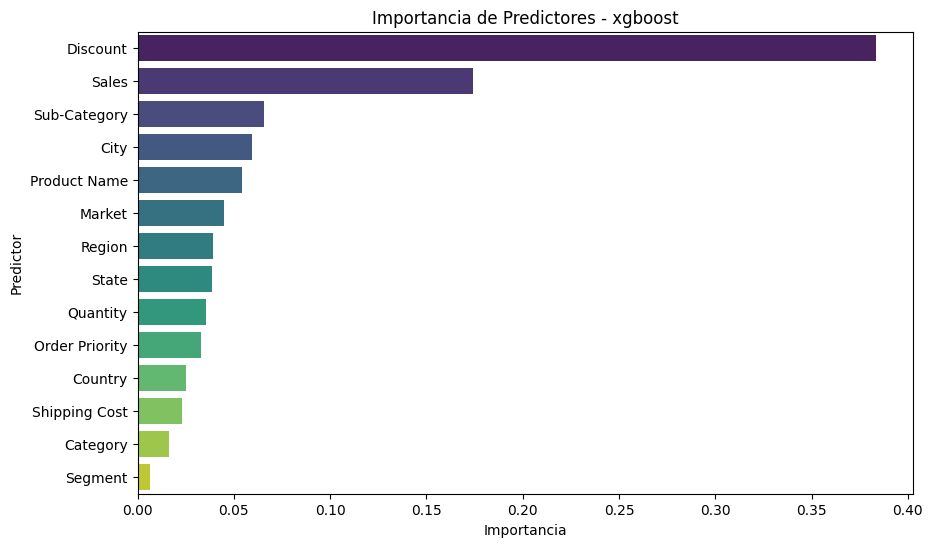

,Predictor,Importancia
11,Discount,0.38
9,Sales,0.17
7,Sub-Category,0.07
1,City,0.06
8,Product Name,0.05
4,Market,0.04
5,Region,0.04
2,State,0.04
10,Quantity,0.04
13,Order Priority,0.03


In [81]:
analisis_xgboost.importancia_predictores("xgboost")


Las métricas siguen siendo malas y con un elevado overfitting

La conclusión es evidente, y es que los modelso de regresión predicen muy mal los beneficios en el cluster -1 obtenido con el método Dbscan. Recordemos que los datos  de este cluster eran aquellos con un mayor numero de ventas ("Sales"), de los que se pidió mayor cantidad ("Quantity"), con mayor beneficio ("Profit") y con mayor coste de envío asociado ("Shipping Cost"). 

Es el cluster menos numeroso de los 3, quizá los datos de los otros dos sean más representativos o simplemente al ser más numero de datos permitan a los algoritmos de regresión predecir mejor. Lo comprobamos a continuación.